In [51]:
# 라이브러리 로드
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [52]:
url ='https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/data2.csv'
df = pd.read_csv(url)
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340


In [53]:
X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()

In [54]:
import machin

In [55]:
data = machin.Dataset(X,y)

In [56]:
# 모델에 적용
kn = KNeighborsClassifier()
#  학습
kn.fit(data.x_train,data.y_train)
# 평가 (train / test)
kn.score(data.x_train,data.y_train), kn.score(data.x_test,data.y_test)

(0.8151260504201681, 0.85)

In [57]:
# 모델.classes_
kn.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [58]:
# 모델.predict_proba(데이터) - 각 클래스별 확률
kn.predict(data.x_test[:5])

array(['E', 'G', 'F', 'E', 'E'], dtype=object)

In [59]:
kn.predict_proba(data.x_test[:5])

array([[0. , 0.4, 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0.2, 0.8, 0. ],
       [0. , 0.2, 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0.8, 0. , 0. ]])

In [60]:
# 로지스틱회귀 -- 확률로 예측
  # 종속변수 : 이진(binary) or 범주형(categorcal) 데이터일때  사용
  # sigmoid(logistic function)
  # 종속변수의 값을 0 ~1 변환하고 예측

In [61]:
# 로지스틱회귀 2진분류 학습, 각각의 선형 계수도 확인
# z = a*Weight + b*Length +.... + bias
df2 = df[((df['Species']=='A') | (df['Species'] =='B'))]
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [62]:
# 데이터준비 ( 스케일링한 train test)
data = machin.Dataset(X,y)

In [63]:
# 모델
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
model.fit(data.x_train,data.y_train)

LogisticRegression()

In [65]:
model.coef_

array([[-0.68547921, -0.29705185, -0.6592105 , -1.83527591, -0.13451362]])

In [66]:
model.score(data.x_train, data.y_train), model.score(data.x_test, data.y_test)

(0.975609756097561, 1.0)

In [67]:
# 다중분류
X = df.iloc[:,1:]
y = df.iloc[:,0]
data = machin.Dataset(X,y)
model = LogisticRegression()
model.fit(data.x_train, data.y_train)
model.score(data.x_train, data.y_train), model.score(data.x_test, data.y_test)

(0.8067226890756303, 0.85)

In [68]:
model.predict(data.x_test[:5])

array(['E', 'G', 'F', 'E', 'E'], dtype=object)

In [69]:
proba = model.predict_proba(data.x_test[:5])
np.round(proba, decimals=3)

array([[0.004, 0.281, 0.01 , 0.092, 0.545, 0.008, 0.061],
       [0.   , 0.087, 0.001, 0.061, 0.126, 0.002, 0.722],
       [0.009, 0.17 , 0.013, 0.009, 0.223, 0.569, 0.006],
       [0.061, 0.257, 0.04 , 0.077, 0.526, 0.036, 0.003],
       [0.004, 0.245, 0.013, 0.03 , 0.664, 0.026, 0.018]])

In [70]:
model.coef_, model.intercept_

(array([[-1.48635407e-01, -8.16338300e-02,  6.40677025e-01,
          2.81886254e+00, -3.23791215e-01],
        [-8.14258430e-01, -5.24809489e-01,  3.53859503e-01,
         -4.21963234e-01,  6.26572878e-01],
        [ 3.44367925e-01,  2.05672435e-02,  5.92141133e-02,
          1.51454608e-01,  1.06454813e+00],
        [-3.35559709e-01, -8.21454187e-01, -8.35625183e-01,
          1.91834624e+00, -8.55673174e-01],
        [ 1.30777936e+00,  3.20627792e-01, -1.31830404e+00,
         -1.71471286e+00,  1.64054397e+00],
        [ 1.33816721e-03,  1.72779398e+00,  1.75766272e+00,
         -1.28638162e+00, -6.35345781e-01],
        [-3.55031912e-01, -6.41091506e-01, -6.57484132e-01,
         -1.46560568e+00, -1.51685481e+00]]),
 array([ 0.38862776,  1.15910169, -0.10802126, -0.11439729,  2.40795555,
         0.04859162, -3.78185807]))

In [71]:
decision =  model.decision_function(data.x_test[:5])
np.round(decision, decimals=3)

array([[-2.354,  1.874, -1.49 ,  0.755,  2.538, -1.674,  0.351],
       [-4.168,  1.731, -2.902,  1.384,  2.105, -1.997,  3.847],
       [-1.445,  1.457, -1.089, -1.482,  1.729,  2.665, -1.835],
       [ 0.02 ,  1.459, -0.394,  0.257,  2.177, -0.518, -3.002],
       [-2.219,  1.845, -1.059, -0.268,  2.843, -0.4  , -0.743]])

In [72]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
np.round(proba, decimals=3)

array([[0.004, 0.281, 0.01 , 0.092, 0.545, 0.008, 0.061],
       [0.   , 0.087, 0.001, 0.061, 0.126, 0.002, 0.722],
       [0.009, 0.17 , 0.013, 0.009, 0.223, 0.569, 0.006],
       [0.061, 0.257, 0.04 , 0.077, 0.526, 0.036, 0.003],
       [0.004, 0.245, 0.013, 0.03 , 0.664, 0.026, 0.018]])

In [73]:
model = LogisticRegression(C=20, max_iter=1000)
# 다중분류
X = df.iloc[:,1:]
y = df.iloc[:,0]
data = machin.Dataset(X,y)
model.fit(data.x_train, data.y_train)
model.score(data.x_train, data.y_train), model.score(data.x_test, data.y_test)

(0.9327731092436975, 0.925)

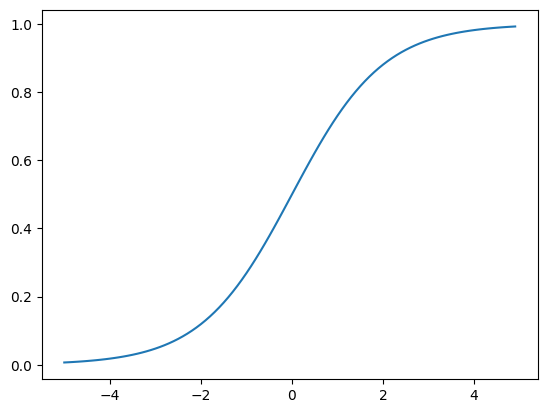

In [76]:
#로지스틱 함수
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z,phi)
plt.show()